In [4]:
# Qubit con nombre qr
from qiskit import QuantumRegister

## (Número de qubits a definir, nombre al qubit)
## Inicia en ket |0>
qr = QuantumRegister(1, 'qr')

In [5]:
# Bit clásico
from qiskit import ClassicalRegister

cr = ClassicalRegister(1, 'cr')

In [6]:
# Circuito
from qiskit import QuantumCircuit

primer_circuito = QuantumCircuit(qr, cr)

In [7]:
# Añadimos una compuerta Z
primer_circuito.z(qr[0])

In [8]:
# Agregamos compuerta de medición
# La medición se guarda en el bit clásico cr
primer_circuito.measure(qr, cr)

In [9]:
!pip3 install pylatexenc

  Using cached pylatexenc-2.10.tar.gz (162 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136863 sha256=0f059ccbf88208f0ff29d84d0493c22f1d51d3dd3201fe7f6e9e59a0301cb384
  Stored in directory: /home/castel-mlm/.cache/pip/wheels/3c/d9/c1/bb2a15d13c742b9035ef7ae6ebe236af270b1d1d9b386dcd5e
Successfully built pylatexenc

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


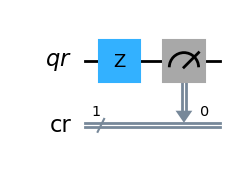

In [11]:
# Dibujamos el circuito
primer_circuito.draw('mpl')

In [12]:
!pip3 install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 30.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [13]:
from qiskit_aer import AerSimulator

backend = AerSimulator(method="statevector")

# Elegimos el circuito y lo repetimos un cierto número de veces
job = backend.run(primer_circuito, shots=100)

resultados = job.result()
counts = resultados.get_counts()

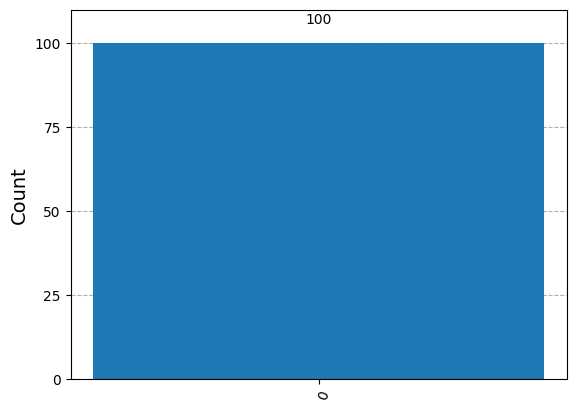

In [14]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

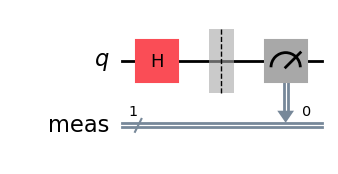

In [15]:
circuito_hadamard = QuantumCircuit(1)
circuito_hadamard.h(0)
circuito_hadamard.measure_all()
circuito_hadamard.draw('mpl')

In [20]:
job = backend.run(circuito_hadamard, shots=100)

resultados = job.result()
counts = resultados.get_counts()

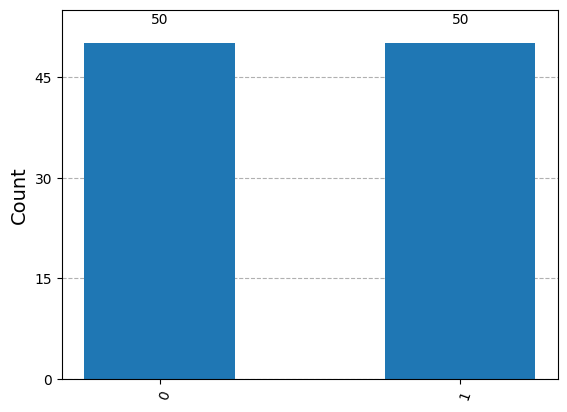

In [21]:
plot_histogram(counts)

In [22]:
import numpy as np

estado_inicial = [1, 1]
estado_inicial /= np.linalg.norm(estado_inicial)

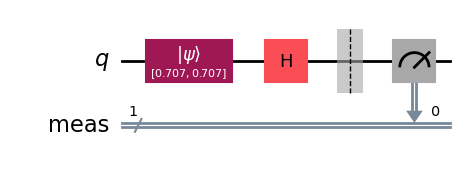

In [23]:
circuito_hadamard = QuantumCircuit(1)
circuito_hadamard.initialize(estado_inicial, 0)
circuito_hadamard.h(0)
circuito_hadamard.measure_all()
circuito_hadamard.draw('mpl')

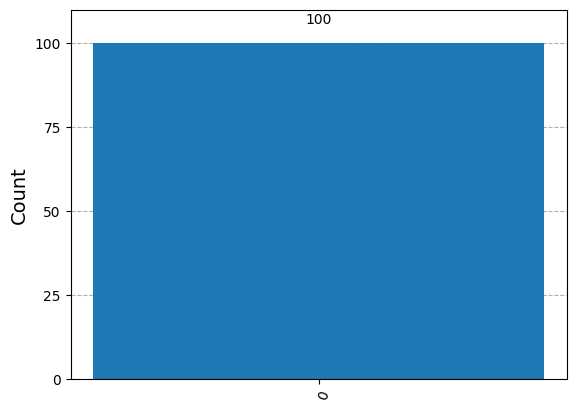

In [25]:
job = backend.run(circuito_hadamard, shots=100)

resultados = job.result()
counts = resultados.get_counts()

plot_histogram(counts)

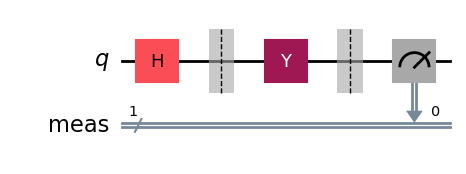

In [26]:
circuito_prueba = QuantumCircuit(1)
circuito_prueba.h(0)
circuito_prueba.barrier(0)
circuito_prueba.y(0)
circuito_prueba.measure_all()
circuito_prueba.draw('mpl')

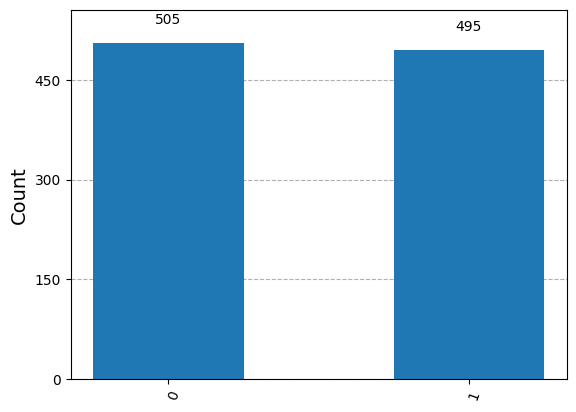

In [27]:
job = backend.run(circuito_prueba, shots=1000)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

## Ejercicio

Implementar un circuito cuántico donde apliquen Hadamard, z, Hadamard, Hadamard.

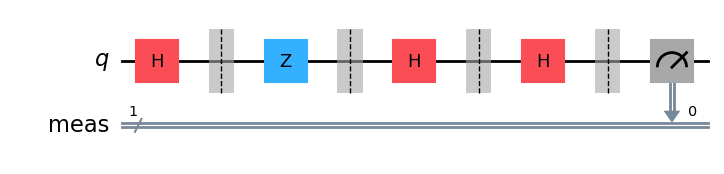

In [28]:
circuito_ex = QuantumCircuit(1)
circuito_ex.h(0)
circuito_ex.barrier(0)
circuito_ex.z(0)
circuito_ex.barrier(0)
circuito_ex.h(0)
circuito_ex.barrier(0)
circuito_ex.h(0)

circuito_ex.measure_all()
circuito_ex.draw('mpl')

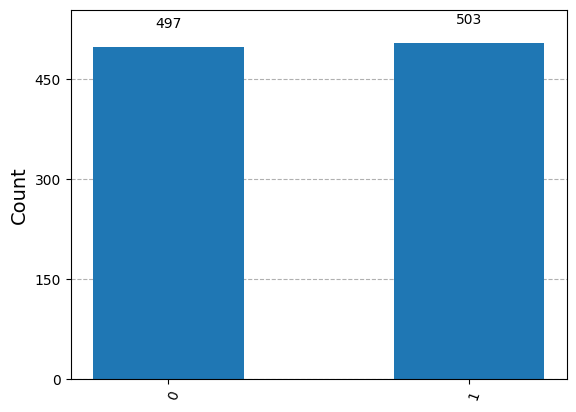

In [30]:
job = backend.run(circuito_ex, shots=1000)

resultados = job.result()
counts = resultados.get_counts()

plot_histogram(counts)